In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [3]:
import cv2

In [4]:
spidey_hands = os.listdir('spidey_hands')
spidey_hands
normal_hands = os.listdir('Hands')
normal_hands

['Hand_0006317.jpg',
 'Hand_0006318.jpg',
 'Hand_0006319.jpg',
 'Hand_0006320.jpg',
 'Hand_0006321.jpg',
 'Hand_0006322.jpg',
 'Hand_0006323.jpg',
 'Hand_0006324.jpg',
 'Hand_0006325.jpg',
 'Hand_0006326.jpg',
 'Hand_0006327.jpg',
 'Hand_0006328.jpg',
 'Hand_0006329.jpg',
 'Hand_0006330.jpg',
 'Hand_0006331.jpg',
 'Hand_0006332.jpg',
 'Hand_0006333.jpg',
 'Hand_0006334.jpg',
 'Hand_0006335.jpg',
 'Hand_0006336.jpg',
 'Hand_0006337.jpg',
 'Hand_0006338.jpg',
 'Hand_0006339.jpg',
 'Hand_0006340.jpg',
 'Hand_0006341.jpg',
 'Hand_0006342.jpg',
 'Hand_0006343.jpg',
 'Hand_0006344.jpg',
 'Hand_0006345.jpg',
 'Hand_0006346.jpg',
 'Hand_0006348.jpg',
 'Hand_0006349.jpg',
 'Hand_0006350.jpg',
 'Hand_0006351.jpg',
 'Hand_0006353.jpg',
 'Hand_0006354.jpg',
 'Hand_0006355.jpg',
 'Hand_0006356.jpg',
 'Hand_0006357.jpg',
 'Hand_0006358.jpg',
 'Hand_0006359.jpg',
 'Hand_0006360.jpg',
 'Hand_0006361.jpg',
 'Hand_0006362.jpg',
 'Hand_0006363.jpg',
 'Hand_0006364.jpg',
 'Hand_0006365.jpg',
 'Hand_000636

In [5]:
normal_hands_labels = np.zeros(len(normal_hands))
spidey_hand_labels = np.ones(len(spidey_hands))
labels = np.concatenate((normal_hands_labels, spidey_hand_labels), axis=0)
labels

array([0., 0., 0., ..., 1., 1., 1.])

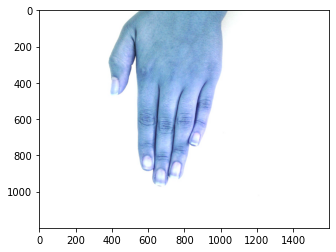

In [6]:
img1 =cv2.imread(f'Hands/{normal_hands[0]}')
plt.imshow(img1)

In [7]:
data = []
for i in normal_hands:
    img = cv2.imread(f'Hands/{i}')
    img = cv2.resize(img, (25,25))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
for i in spidey_hands:
    img = cv2.imread(f'spidey_hands/{i}')
    img = cv2.resize(img, (25,25))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(img)
    

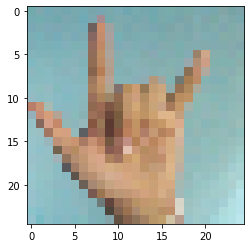

In [8]:
plt.imshow(data[-1])

Converting the images list to numpy images

In [9]:
data[0].shape, type(data)

((25, 25, 3), list)

In [10]:
array_data = np.array(data)

In [11]:
array_data.shape

(1499, 25, 25, 3)

In [12]:
array_data[0].shape

(25, 25, 3)

In [13]:
array_data = array_data/255

In [14]:
array_data[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(array_data, labels, test_size=0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 25, 25, 3), (300, 25, 25, 3), (1199,), (300,))

# Building the convolution Neural Network(CNN)

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
x_train[0].shape

(25, 25, 3)

In [19]:
num_of_classes = 2
model = keras.Sequential()
# Adding the first CNN layers
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(25,25,3)))
# adding the second CNN with maxx pooling
model.add(keras.layers.MaxPooling2D(2,2))

# Adding the third CNN layer
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

# Adding the fourth CNN layer with max pooling
model.add(keras.layers.MaxPooling2D(2,2))

# adding the flatten layer
model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(128, activation='relu'))


model.add(keras.layers.Dropout(0.5))


# Adding the first dense layer
model.add(keras.layers.Dense(64, activation='relu'))

# Droupout layer
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units=num_of_classes, activation='softmax'))



In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               1

# Training the CNN

In [21]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
38/38 [==============================] - 3s 36ms/step - loss: 0.1658 - accuracy: 0.9541 - val_loss: 0.0569 - val_accuracy: 0.9867
Epoch 2/10
38/38 [==============================] - 1s 23ms/step - loss: 0.1289 - accuracy: 0.9708 - val_loss: 0.0473 - val_accuracy: 0.9867
Epoch 3/10
38/38 [==============================] - 1s 22ms/step - loss: 0.1056 - accuracy: 0.9708 - val_loss: 0.0514 - val_accuracy: 0.9867
Epoch 4/10
38/38 [==============================] - 1s 21ms/step - loss: 0.0541 - accuracy: 0.9708 - val_loss: 0.0141 - val_accuracy: 0.9867
Epoch 5/10
38/38 [==============================] - 1s 27ms/step - loss: 0.0291 - accuracy: 0.9791 - val_loss: 0.0087 - val_accuracy: 0.9967
Epoch 6/10
38/38 [==============================] - 1s 25ms/step - loss: 0.0186 - accuracy: 0.9925 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/10
38/38 [==============================] - 1s 23ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/10
38

In [23]:
y_pred = model.predict(x_test)

10/10 [==============================] - 0s 7ms/step


In [24]:
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [26]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
# import confusion matrix, accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


In [29]:
cm, acc

(array([[296,   0],
        [  0,   4]], dtype=int64),
 1.0)

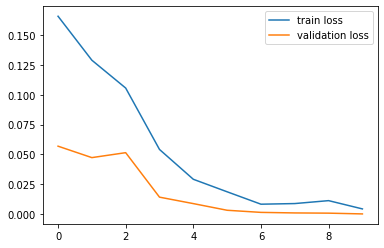

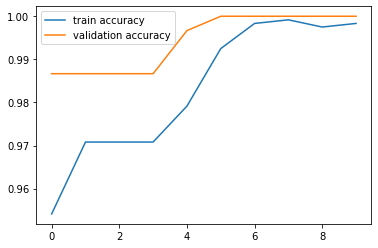

In [30]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [34]:
new_img = cv2.imread(f'Hands/Hand_0006317.jpg')
new_img = cv2.resize(new_img, (25,25))
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
new_img = np.expand_dims(new_img, axis=0)
new_img = new_img/255
hehw = model.predict(new_img) 
hehe = np.argmax(hehw, axis=1)
print(hehw, hehe)



1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 1.7613896e-11]] [0]


In [32]:
wow =np.argmax([[0.1, 0.2, 0.3, 0.4 ,0.5]], axis=1)
print(wow)
# here 4 denotes 0.5 is the highest


[4]


In [35]:
import cv2
import numpy as np

# Load your pre-trained CNN model

# Define the desired dimensions
desired_width = 25
desired_height = 25

# Initialize the webcam
video_capture = cv2.VideoCapture(0)  # 0 represents the default webcam device

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = video_capture.read()

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Resize the frame to match the desired dimensions
    resized_frame = cv2.resize(frame, (desired_width, desired_height))

    # Convert the image to RGB format
    resized_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Convert the image to numpy array
    resized_frame = np.asarray(resized_frame)

    # Expand dimensions to match the input shape of your CNN model
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Normalize pixel values
    resized_frame = resized_frame / 255.0

    # Pass the preprocessed frame through your CNN model for person detection
    predictions = model.predict(resized_frame)
    print(f"This is x: {predictions}")
    y = np.argmax(predictions, axis=1)
    if y == 0:
        print('Normal Hand')
    # else:
    #     print('Normal Hand')

    # Display the frame with overlays or visual indicators of person detection
    cv2.imshow('Hand Detection', frame)
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the windows
video_capture.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 20ms/step
This is x: [[0.41616437 0.58383566]]
1/1 [==============================] - 0s 35ms/step
This is x: [[0.38089848 0.6191015 ]]
1/1 [==============================] - 0s 53ms/step
This is x: [[0.34330243 0.65669763]]
1/1 [==============================] - 0s 63ms/step
This is x: [[0.29690704 0.703093  ]]
1/1 [==============================] - 0s 34ms/step
This is x: [[0.30457178 0.69542825]]
1/1 [==============================] - 0s 20ms/step
This is x: [[0.17920001 0.8208    ]]
1/1 [==============================] - 0s 21ms/step
This is x: [[0.1906343  0.80936575]]
1/1 [==============================] - 0s 28ms/step
This is x: [[0.19157763 0.8084224 ]]
1/1 [==============================] - 0s 23ms/step
This is x: [[0.1742297  0.82577026]]
1/1 [==============================] - 0s 20ms/step
This is x: [[0.1742297  0.82577026]]
1/1 [==============================] - 0s 32ms/step
This is x: [[0.14064044 0.85935956]]
1/1 [================